# Reproduce  A. M. Messinis, et. al, Nature Catalysis, 2019,  2,  123-133 

This notebook demonstrates reproducing the results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 



Antonis M. Messinis, Stephen L. J. Luckham, Peter P. Wells, Diego Gianolio, Emma K. Gibson, Harry M. O’Brien, Hazel A. Sparkes, Sean A. Davis, June Callison, David Elorriaga, Oscar Hernandez-Fajardo & Robin B. Bedford (2019) **The highly surprising behaviour of diphosphine ligands in iron-catalysed Negishi cross-coupling** Nature Catalysis, 2019,  2,  123-133 DOI: [10.1038/s41929-018-0197-z](https://doi.org/10.1038/s41929-018-0197-z).

- **Corresponding author**: Robin B. Bedford
- **E-mail**: 


The data used for reproducing the results was published in the University of Bristol Research Data Repository [10.5523/bris.1kp2f62x3klb02mfz2qymcmxmx](https://data.bris.ac.uk/data/dataset/1kp2f62x3klb02mfz2qymcmxmx).


For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing Results
[Figure 5](https://www.nature.com/articles/s41929-018-0197-z/figures/5) contains the first XAS results presented in the paper.

>Fig. 5 | Time-resolved XAFS spectroscopy studies. a, Formation of cross-coupled and homo-coupled products in the coupling of 1 and 2a at 22 °C. Time 
points A–D corresponding to the points when XAFS data were recorded using the flow reactor (A = 6 s, B = 166 s, C = 482 s, D = 817 s). The colours used for
time-point indicators A– D correspond to the colours of the spectra recorded at these time point shown in c–f; the colours used for the chemical structures
correspond to the colours of the plots in the graphs shown in a and b. b, Expansion of the first 30 s of the reaction, highlighting the catalytic ‘burst’ phase.
**c, Magnitude k2 Fourier transform data** of the Fe foil and the reaction of 1 + 2/MgBr2 catalysed by FeBr2(dpbz)2] (7a) at time points A–D. The shaded
areas are used to highlight the areas of scattering contribution from Fe–Fe (grey), Fe–C/O (orange) and Fe–Br (green).**d, Normalized XANES spectra** of
the Fe foil, FeBr2 and positions A–D. **e, Normalized XANES data** showing a close-up of the edge position of complex 7a (FeBr2(dpbz)2) and positions A–D. **f, Normalized
XANES derivative spectra** of the Fe foil, FeBr2 and positions A–D. The shaded areas are used to highlight the features associated with metallic Fe (grey) and
bromidic Fe (green).



### Data Identification
Data needs merging (assuming all readings correspond to same time). All data is in the "XAS Data" folder of the zip file.
For reproduction we assume that:
|paper label|path |contents|
|:--------- |:----|:-------------|
| A-D       |\XAS data\SI77 and Figure 5\Position A|A = 6 s |
|           |\XAS data\SI77 and Figure 5\Position B|B = 166 s|
|           |\XAS data\SI77 and Figure 5\Position C|C = 482 s|
|           |\XAS data\SI77 and Figure 5\Position D|D = 817 s|
|Fe Metal   |\XAS data\SI70                        |Fe foil standard
|FeBr       |\XAS data\SI80                        |FeBr standard
|7a         |\XAS data\SI81                        |FeBr2dpbz

Alternative standards can be found in the athena project SITable5.prj (also in the "\XAS data" folder):
 
|paper label|group           |contents        |
|:--------- |:----           |:---------      |
|Fe Metal   |Fe_foil_may17   |Fe foil standard|
|FeBr       |FeBr_Br         |FeBr standard   |
|7a         |FeBr2(dpbz)2_Br |FeBr2dpbz       |


In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline

# define data location
data_path =  "C:/harwell/PSDI_test/wf_data/pub_047/XAS data"

# define mappings:
data_mappings={"Fe Metal": "SI70/*.dat",
               "A":        "SI77 and Figure 5/Position A/*.dat",
               "B":        "SI77 and Figure 5/Position B/*.dat",
               "C":        "SI77 and Figure 5/Position C/*.dat",
               "D":        "SI77 and Figure 5/Position D/*.dat",
               "FeBr":     "SI80/*.dat", 
               "7a":       "SI71/*.dat",}
# Output prefix
f_prefix = "FeBr_bpbz"

# Labels for data in .dat files
               #"0             1    2  3  4    5      6        7
               #"qexafs_energy time I0 It Iref lnI0It lnItIref Element_0 Element_1 Element_2 Element_3 Element_4	Element_5	Element_6	Element_7	Element_8	Element_9	Element_10	Element_11	Element_12	Element_13	Element_14	Element_15	Element_16	Element_17	Element_18	Element_19	Element_20	Element_21	Element_22	Element_23	Element_24	Element_25	Element_26	Element_27	Element_28	Element_29	Element_30	Element_31	Element_32	Element_33	Element_34	Element_35	  FF	 QexafsFFI0"
               #"0      1    2  3  4    5      6"
column_labels = "energy time I0 It Iref lnI0It mu Element0 Element1 Element2 Element3 Element4 Element5 Element6 Element7 Element8 FF QexafsFFI0"

show_graph = True # False to prevent showing graphs

### Recover and process beamline data

Recover, merge and save beamline data in an athena project

In [13]:
# start processing createa an output dir and sets the logger
source_path, out_path = athenamgr.files_setup(f_prefix, data_path)

merged_results={}
# read all samples, merge and then normalise
for a_sample in data_mappings:
    files_list = athenamgr.get_files_list(source_path, data_mappings[a_sample])

    # read the files for each sample

    sample_list = []

    for i_count, a_file  in enumerate(files_list):
        file_name = a_file.name
        f_suffix = str(i_count).zfill(4) 
        p_name = f_prefix+f_suffix
        p_path = Path(out_path , p_name + ".prj")
        a_group = athenamgr.read_text(a_file, column_labels)
        sample_list.append(a_group)
        
    # merge readings for sample
    merged_xas = athenamgr.merge_readings(sample_list)

    # rename group (same as the file name)
    merged_xas.filename = a_sample
    merged_results[a_sample] = merged_xas
    
merged_prj = Path(out_path,"febr_merge.prj")
# save merged results
athenamgr.save_groups(list(merged_results.values()), merged_prj)

### Recover standards 

Recover and save data in a second athena project

In [3]:
# get the standards from athena project:
fe_standards = "C:/harwell/PSDI_test/wf_data/pub_047/XAS data/SITable5.prj"
# read the input file 

data_prj = athenamgr.read_project(fe_standards)
standard_mappings={"Fe Metal":"Fe_foil_may17",
                  "FeBr": "FeBr2_Br",
                  "7a":"FeBr2_dpbz_2_Br",}

# recalibrate to aling with fe E0 7111.96
recalibrate_e0_to = 7111.96
standard_groups = {}
for a_mapping in standard_mappings:
    standard_groups[a_mapping] = athenamgr.get_group(data_prj, standard_mappings[a_mapping])
    standard_groups[a_mapping].filename = a_mapping
    standard_groups[a_mapping] = athenamgr.recalibrate_energy(standard_groups[a_mapping], recalibrate_e0_to)

standard_prj = Path(out_path,"febr_standards.prj")
# save standards
athenamgr.save_groups([standard_groups["Fe Metal"],standard_groups["FeBr"],
                          standard_groups["7a"]], standard_prj)

### Reproducing 5c: Magnitude k2 Fourier transform data

A-D indicate the time points at at wich Fe Foil XAS data was recorded and the black line corresponds to Fe Foil (Standard).
A-D are in the 

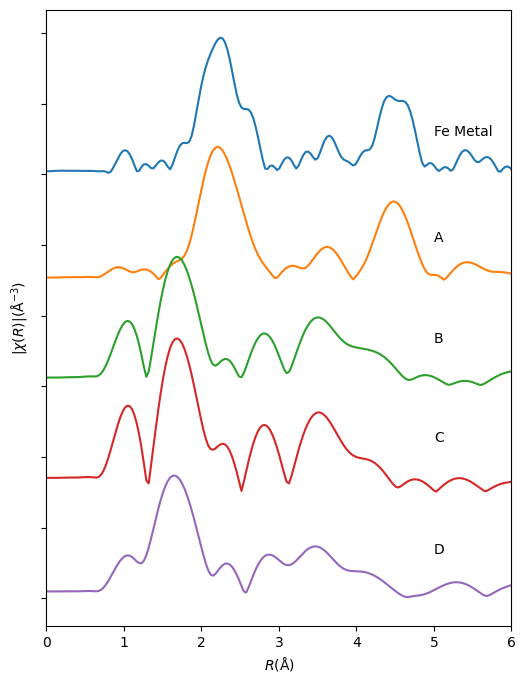

In [4]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# read the input file 
athena_prj = athenamgr.read_project(merged_prj)

# gather all the groups
athena_groups = athenamgr.get_groups(athena_prj)


# recalculate athena vals 
for g_indx ,a_group in enumerate(athena_groups):
    athenamgr.calc_with_defaults(a_group)
    
# plot using the xas data for Fe    
plt.figure(figsize=(6, 8))
offset = 3.0
include_groups = ["Fe Metal", "A", "B", "C", "D"]
for g_indx ,a_group in enumerate(athena_groups):
    if a_group.filename in include_groups:
        plt.plot(a_group.r, a_group.chir_mag - (g_indx*offset) )
        plt.text(5.0, a_group.chir_mag[len(a_group.chir_mag)-1] - (g_indx*offset)+1.0, a_group.filename)
plt.ylabel("$|\chi(R)| (\mathrm{\AA}^{-3})$")
plt.xlabel("$R(\mathrm{\AA})$")
plt.xlim([0, 6])
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.show()


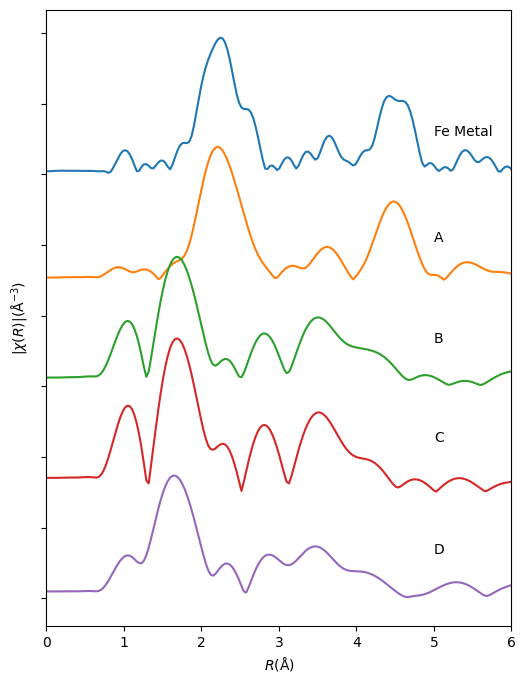

In [4]:
def plot_chir_magnitude(athena_groups = {}, include_groups = [], offset = 0.5, aspect = (6,8), legend_x = 7140, xlim=[]):

    # plot using the xas data for Fe    
    plt.figure(figsize=(6, 8))
    offset = 3.0
    include_groups = ["Fe Metal", "A", "B", "C", "D"]
    for g_indx ,a_group in enumerate(athena_groups):
        if a_group.filename in include_groups:
            # get index of energy value closer to where the label shoud be placed
            idx = np.abs(a_group.r[idx] - legend_x).argmin()
            plt.plot(a_group.r, a_group.chir_mag - (g_indx*offset) )
            plt.text(a_group.r[idx], a_group.chir_mag[idx] - (g_indx*offset)+1.0, a_group.filename)
    plt.ylabel("$|\chi(R)| (\mathrm{\AA}^{-3})$")
    plt.xlabel("$R(\mathrm{\AA})$")
    plt.xlim(xlim)
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    return plt

plot_groups = ["Fe Metal", "A", "B", "C", "D"]
v_offset = 3.0
plot_dimensions = (6,8)
line_label_x = 5.0
radius_range = [0, 6]
ply = plot_chir_magnitude(athena_groups = athena_groups, include_groups = plot_groups, 
                          offset = v_offset, aspect = plot_dimensions, 
                          legend_x = line_label_x, xlim=radius_range)
plt.show()


### Reproducing 5d: Normalized XANES spectra

A-D indicate the time points at at wich Fe Foil XAS data was recorded, the black line corresponds to Fe Foil, and orange line at the bottom corresponds to FeBr<sub>2</sub>.

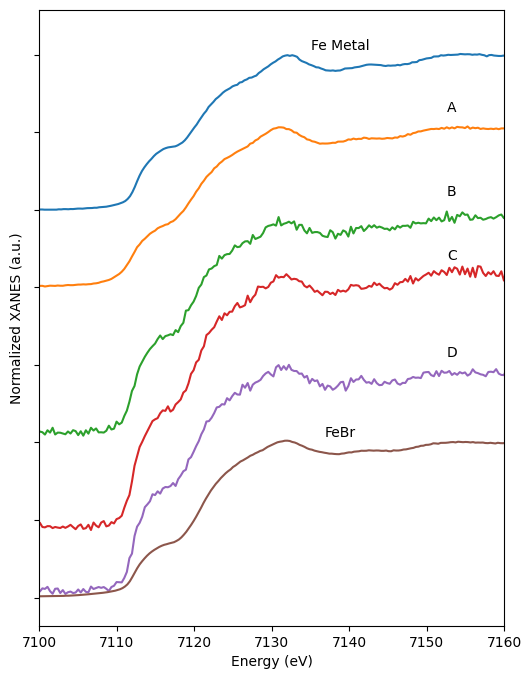

In [30]:
#def plot_normailised_offset(athena_groups = {}, include_groups = [], offset = 0.5, aspect = (6,8), legend_x = 7140  )
plt.figure(figsize=(6,8))
legend_x = 7135
offset = 0.5
# get index of energy value closer to where the label shoud be placed
idx = np.abs(a_group.energy - legend_x).argmin()

include_groups = ["Fe Metal", "A", "B", "C", "D", "FeBr"]

for g_indx ,a_group in enumerate(athena_groups):
    if a_group.filename in include_groups:
        plt.text(a_group.energy[idx], a_group.norm[idx] - (g_indx*offset)+.1, a_group.filename)
        plt.plot(a_group.energy, a_group.norm - (g_indx*offset) )

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.ylabel("Normalized XANES (a.u.)")
plt.xlabel("Energy (eV)")
plt.xlim([7100, 7160])

plt.show()



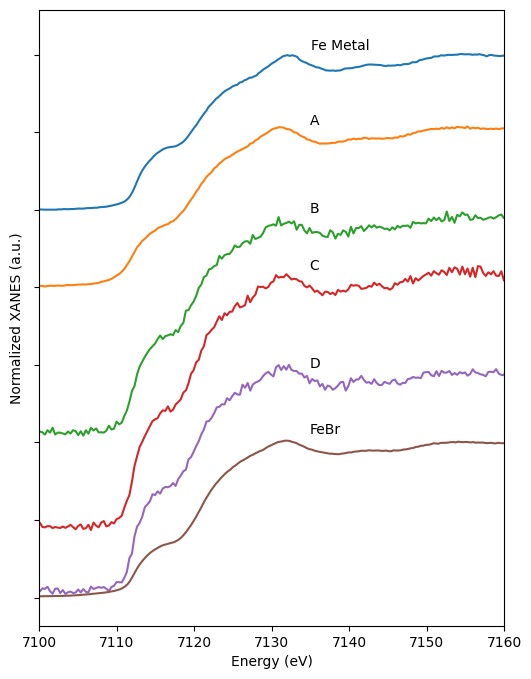

In [39]:
def plot_normailised_offset(athena_groups = {}, include_groups = [], offset = 0.5, aspect = (6,8), legend_x = 7140, xlim=[]):
    plt.figure(figsize=aspect)
    idx = np.abs(athena_groups[1].energy - legend_x).argmin()

    include_groups = ["Fe Metal", "A", "B", "C", "D", "FeBr"]

    for g_indx ,a_group in enumerate(athena_groups):
        if a_group.filename in include_groups:
            # get index of energy value closer to where the label shoud be placed
            idx = np.abs(a_group.energy - legend_x).argmin()
            plt.text(a_group.energy[idx], a_group.norm[idx] - (g_indx*offset)+.1, a_group.filename)
            plt.plot(a_group.energy, a_group.norm - (g_indx*offset) )

    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    plt.ylabel("Normalized XANES (a.u.)")
    plt.xlabel("Energy (eV)")
    plt.xlim(xlim)

    return plt

plot_groups = ["Fe Metal", "A", "B", "C", "D", "FeBr"]
v_offset = 0.5
plot_dimensions = (6,8)
line_label_x = 7135
energy_range = [7100, 7160]
plt = plot_normailised_offset(athena_groups = athena_groups, include_groups =plot_groups, offset = v_offset, aspect = plot_dimensions, 
                              legend_x = line_label_x, xlim=energy_range)
plt.show()

### Reproducing 5e: Normalized XANES spectra (close up)

A-D indicate the time points at at wich Fe Foil XAS data was recorded, cyan line at the bottom corresponds to complex 7a.

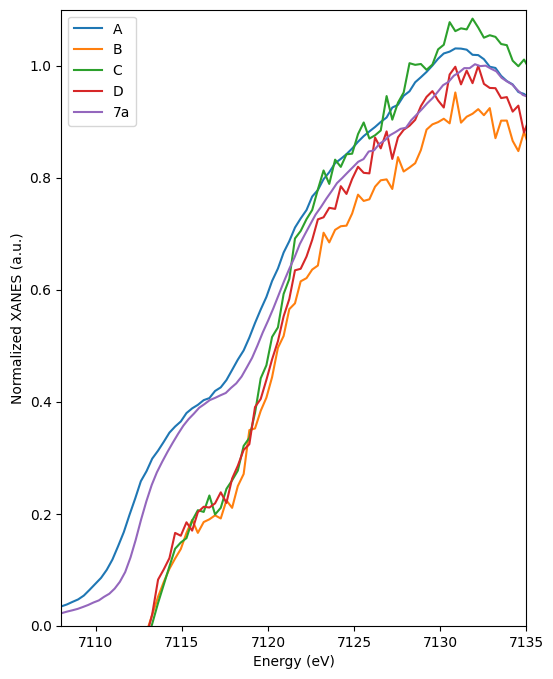

In [40]:
include_groups = ["7a", "A", "B", "C", "D"]
plt.figure(figsize=(6,8))
for g_indx ,a_group in enumerate(athena_groups):
    if a_group.filename in include_groups:
        #plt.text(7125, a_group.norm[806]-1, a_group.filename)#- (g_indx*offset), a_group.filename)
        plt.plot(a_group.energy, a_group.norm, label=a_group.filename ) 

frame1 = plt.gca()
#frame1.axes.yaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])
plt.ylabel("Normalized XANES (a.u.)")
plt.xlabel("Energy (eV)")
plt.xlim([7108, 7135])
plt.ylim([0, 1.1])
plt.legend()
plt.show()

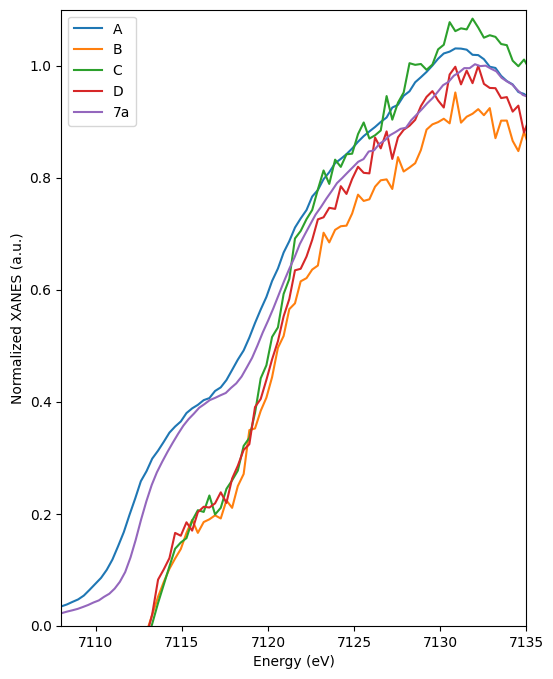

In [41]:
def plot_normailised(athena_groups = {}, include_groups = [], aspect = (6,8), xlim=[],ylim=[]):
    plt.figure(figsize=aspect)
    for g_indx ,a_group in enumerate(athena_groups):
        if a_group.filename in include_groups:
            plt.plot(a_group.energy, a_group.norm, label=a_group.filename ) 

    frame1 = plt.gca()
    #frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticklabels([])
    plt.ylabel("Normalized XANES (a.u.)")
    plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

    return plt


plot_groups = ["A", "B", "C", "D", "7a"]
plot_dimensions = (6,8)
energy_range = [7108, 7135]
mu_range = [0,1.1]
plt = plot_normailised(athena_groups = athena_groups, include_groups = plot_groups, 
                       aspect = plot_dimensions, xlim=energy_range, ylim = mu_range)
plt.show()


### Reproducing 5f: Normalized XANES derivative spectra

A-D indicate the time points at at wich Fe Foil XAS data was recorded, the black line corresponds to Fe Foil, and orange line at the bottom corresponds to FeBr<sub>2</sub>.

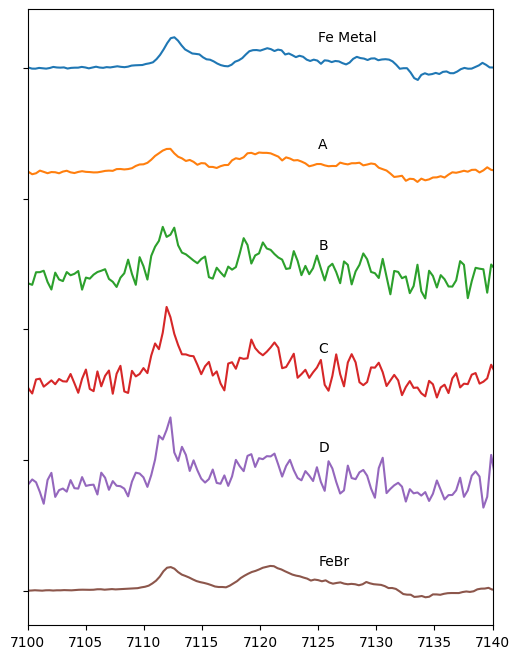

In [7]:
offset = 0.4
include_groups = ["Fe Metal", "A", "B", "C", "D", "FeBr"]
plt.figure(figsize=(6,8))
for g_indx ,a_group in enumerate(athena_groups):
    if a_group.filename in include_groups:
        plt.text(7125, a_group.dmude[806]-(g_indx*offset)+0.1, a_group.filename)
        plt.plot(a_group.energy, a_group.dmude - (g_indx*offset), label=a_group.filename ) 

frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

plt.xlim([7100, 7140])
#plt.legend()
plt.show()

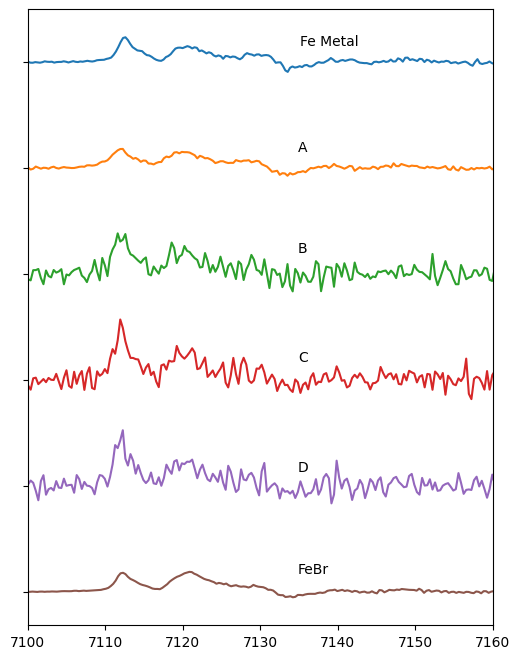

In [42]:
def plot_norm_deriv_offset(athena_groups = {}, include_groups = [], offset = 0.5, aspect = (6,8), legend_x = 7125, xlim=[]):
    plt.figure(figsize=aspect)
    for g_indx ,a_group in enumerate(athena_groups):
        if a_group.filename in include_groups:
            # get index of energy value closer to where the label shoud be placed
            idx = np.abs(a_group.energy - legend_x).argmin()
            plt.text(a_group.energy[idx], a_group.dmude[idx]-(g_indx*offset)+0.1, a_group.filename)
            plt.plot(a_group.energy, a_group.dmude - (g_indx*offset), label=a_group.filename ) 

    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])

    plt.xlim(xlim)
    return plt

plot_groups = ["Fe Metal", "A", "B", "C", "D", "FeBr"]
v_offset = 0.5
plot_dimensions = (6,8)
line_label_x = 7135
energy_range = [7100, 7160]

plt = plot_norm_deriv_offset(athena_groups = athena_groups, include_groups =plot_groups, offset = v_offset, aspect = plot_dimensions, 
                              legend_x = line_label_x, xlim=energy_range)

In [8]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

import numpy as np

'''
 # Whittaker filter / smoothing adapted from several sources based on:
 "A perfect smoother"
 Paul H. C. Eilers 
 Anal. Chem. 2003, 75, 3631-3636
 DOI: https://doi.org/10.1021/ac034173t
 # Whittaker paper 
 "On a new method of gradutation"
 E. T. Whittaker
 Proceedings of the Edinburgh Mathematical Society 1922, 41, 63-75
 DOI: https://doi.org/10.1017/S0013091500077853
 # open more than one datat set under windows: 
 open powershell: baseline.py (Get-ChildItem *.txt -Name)
'''

#Whittaker filter (smoothing)
def whittaker(y,lmd = 2, d = 2):
    #lmd: smoothing parameter lambda,
    #the suggested value of lambda = 1600 seems way to much for Raman spectra
    #d: order of differences in penalty (2)
    L = len(y)
    E = sparse.csc_matrix(np.diff(np.eye(L), d))
    W = sparse.spdiags(np.ones(L), 0, L, L)
    Z = W + lmd * E.dot(E.transpose())
    z = spsolve(Z, np.ones(L)*y)
    return z

(-1.0, 1.5)

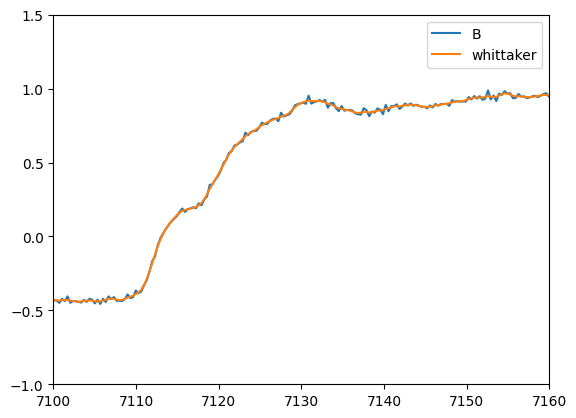

In [9]:
# smooth data for plotting ** NOT FOR FURTHER PROCESSING **
from larch.xafs import xas_deconvolve
test = athena_groups[2]
test.whittaker = whittaker(test.norm, lmd = 2, d = 2)
xas_deconvolve(test, esigma=1.0,smooth=True)
rebinned_gr = athenamgr.rebin_group(athena_groups[4])
athenamgr.calc_with_defaults(rebinned_gr)
plt.plot(test.energy, test.norm, label=test.filename)
#plt.text(test.energy[826-20]+.01, test.norm[826-20], str(test.filename))
#plt.plot(test.energy, test.deconv, label='deconvolved')
#plt.plot(test.energy, test.baseline_als, label='baseline')
plt.plot(test.energy, test.whittaker, label='whittaker')

#plt.text(test.energy[826-20], test.norm[826-40], 'smooth')
#plt.plot(rebinned_gr.energy, rebinned_gr.norm, label='rebinned')
plt.legend()
plt.xlim([7100, 7160])
plt.ylim([-1, 1.5])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(athena_groups[0].energy, athena_groups[0].norm)
plt.text(athena_groups[0].energy[826-20], athena_groups[0].norm[826-20],  athena_groups[0].filename)
plt.xlim([7100, 7160])

In [ ]:
for g_indx ,a_group in enumerate(athena_groups):
    if a_group.filename in include_groups:
        ax2.plot(a_group.energy, a_group.norm)
        
ax2.set_xlim([7110, 7128])

In [ ]:
a_group

In [12]:
list(merged_results.values())

[<Group 0x13643639790>,
 <Group 0x1364366abb0>,
 <Group 0x13643639640>,
 <Group 0x13643633430>,
 <Group 0x13643633310>,
 <Group 0x136436333a0>,
 <Group 0x13643633c70>]